In [8]:
# Matrix Factorization without Bias
import numpy as np
import random
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    s = np.dot(Vj, (Yij - np.dot(Ui, Vj)))
    return eta * (np.dot(reg, Ui) - s)
    


def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """

    s = np.dot(Ui, (Yij - np.dot(Ui, Vj)))
    return eta * (np.dot(reg, Vj) - s)

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0.0
    for k in range(len(Y)):
        i, j, sign = Y[k]
        curr = np.dot(U[i-1], V[j-1])
        
        err += .5 *((sign - curr) ** 2)
    return err / len(Y)
    


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    itr = 0
    U = np.random.uniform(-0.5, 0.5, (M, K))
    V = np.random.uniform(-0.5, 0.5, (N, K))
    # get initial loss
    ind = list(range(len(Y)))
    shuffled = np.random.permutation(ind)
    curr_loss = get_err(U,V,Y)
    for k in range(len(Y)):
        ind = shuffled[k]
        i, j, Yij = Y[ind]
        # update U, V
        u = grad_U(U[i-1], Yij, V[j-1],reg, eta)
        v = grad_V(V[j-1], Yij, U[i-1],reg, eta)
        U[i-1] = U[i-1] - u 
        V[j-1] = V[j-1] - v
    next_loss = get_err(U, V, Y)
    init = curr_loss - next_loss
    curr_delta = init
    curr_loss = next_loss
    while itr < max_epochs and (curr_delta / init) > eps:
        ind = list(range(len(Y)))
        shuffled = np.random.permutation(ind)
        for k in range(len(Y)):
            ind = shuffled[k]
            ii, jj, Yij = Y[ind]
            i = int(ii)
            j = int(jj)
            u = grad_U(U[i-1], Yij, V[j-1],reg, eta)
            v = grad_V(V[j-1], Yij, U[i-1],reg, eta)
            U[i-1] = U[i-1] - u 
            V[j-1] = V[j-1] - v
        next_loss = get_err(U,V,Y)

        curr_delta = curr_loss - next_loss
        curr_loss = next_loss
        itr += 1
        
    print(curr_loss, itr)
    return U, V, curr_loss




In [10]:
# Find optimal regularization and stopping condition parameters
import numpy as np
import matplotlib.pyplot as plt

		

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt')	.astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
eps = [0.00001, 0.0001, 0.001]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []
    
    for ep in eps:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s, eps = %s"%(M, N, K, eta, reg, ep))
        U,V, e_in = train_model(M, N, K, eta, reg, Y_train, eps=ep)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)





Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001, eps = 1e-05
0.25595160966177516 11
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001, eps = 0.0001
0.25218587041652224 12
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001, eps = 0.001
0.290833937791124 5
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001, eps = 1e-05
0.2735933755209068 9
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001, eps = 0.0001
0.2750468367660178 8
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001, eps = 0.001
0.28582698317881844 6
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01, eps = 1e-05
0.2607390583687554 9
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01, eps = 0.0001
0.2612673720424708 10
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01, eps = 0.001
0.2851310070337071 6
Training model with M = 943, N = 1682, k = 20, 

In [ ]:
# Plot values of E_in across stopping criteria for each value of lambda
for i in range(len(regs)):
    plt.plot(eps, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. Stopping Criteria')
plt.xlabel('Stopping Criteria')
plt.ylabel('Error')
plt.legend()
plt.savefig('ein.png')	
plt.clf()

![title](ein.png)

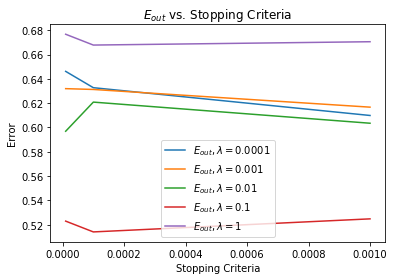

In [26]:
# Plot values of E_out across stopping criteria for each value of lambda
for i in range(len(regs)):
    plt.plot(eps, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. Stopping Criteria')
plt.xlabel('Stopping Criteria')
plt.ylabel('Error')
plt.legend()	
plt.savefig('eout.png')		



In [9]:
# After finding optimal stopping condition and lambda, find optimal learning rate. 
import numpy as np
import matplotlib.pyplot as plt

		

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt')	.astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
eps = 0.00001

regs = .1
etas = [0.01, 0.03, 0.07, 0.1] # learning rate
E_ins2 = []
E_outs2 = []

# Use to compute Ein and Eout
for eta in etas:
    U,V, e_in = train_model(M, N, K, eta, regs, Y_train, eps=eps)
    E_ins2.append(e_in)
    E_outs2.append(get_err(U, V, Y_test))
    


0.2878887630584867 42
0.3003821440050754 19
0.3861384133065685 9
0.48450446196712194 7


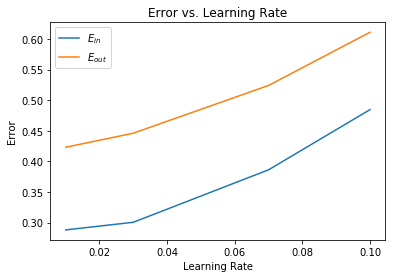

In [10]:
plt.plot(etas, E_ins2, label='$E_{in}$')
plt.plot(etas, E_outs2, label='$E_{out}$')
plt.title('Error vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.legend()
plt.savefig('e_learn.png')	
plt.show()

In [2]:
# Obtain final U, V using all the optimal parameters. 
import numpy as np
import matplotlib.pyplot as plt

Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt')	.astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
U, V, e_in = train_model(M, N, K, .01, .1, Y_train, eps=.00001)
print(get_err(U, V, Y_test))

0.2860431427193403 43
0.4212399208920167
